<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_1_4_Gradient_Descent_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Lab

## Imports

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Goal

- automate the process of optimizing $w$ and $b$ using gradient descent

## Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \$300,000 and a house with 2000 square feet sold for \$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

## The data

In [22]:
# the data
x_train = np.array([1.0, 2.0]) # features
y_train = np.array([300.0, 500.0]) # target value

## `sklearn.linear_model.LinearRegression`

In [23]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)

w_best = model.coef_[0]
b_best = model.intercept_
cost_best = mean_squared_error(y_train, model.predict(x_train.reshape(-1, 1)))

w_best, b_best, cost_best / 2

(199.99999999999994, 100.00000000000011, 8.077935669463161e-28)

## Implement Gradient Descent

Three main functions are needed:

1. `compute_gradient`
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}  
\\
\frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})  
\end{align}
$$
2. `compute_cost`
$$
J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2
$$
3. `gradient_descent`
 - utilizes `compute_gradient` and `compute_cost`

In [24]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): target values
        w,b (scalar)    : model parameters
    Returns
        dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b
        """

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

# test the function
compute_gradient(x_train, y_train, w_best, b_best)

(2.842170943040401e-14, 2.842170943040401e-14)

In [25]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost

    total_cost = (1 / (2 * m)) * cost
    return total_cost

# test the function
compute_cost(x_train, y_train, w_best, b_best)

0.0

In [26]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, f_cost, f_gradient):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
        x (ndarray (m,))  : Data, m examples
        y (ndarray (m,))  : target values
        w_in,b_in (scalar): initial values of model parameters
        alpha (float):     Learning rate
        num_iters (int):   number of iterations to run gradient descent
        f_cost:     function to call to produce cost
        f_gradient: function to call to produce gradient

    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b]
        """

    J_history = [] # history of cost values
    p_history = [] # history of parameters [w,b]
    w = w_in
    b = b_in

    for i in range(num_iters):
        # calculate the gradient
        dj_dw, dj_db = f_gradient(x, y, w, b)

        # update the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # limit this to 100_000 iterations to prevent resource exhaustion
        if i < 10_000:
            J_history.append(f_cost(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters / 10) == 0:
            print(
                f'Iteration: {i:4}, Cost {J_history[-1]:0.2e}, '
                f'dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e},  '
                f'w: {w: 0.3e}, b: {b: 0.5e}'
            )

    return w, b, J_history, p_history

## Use our 3 functions to find the values for $[w,b]$ that minimize the cost function

In [27]:
w_init = 0
b_init = 0
iterations = 10_000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train,
                                                    y_train,
                                                    w_init,
                                                    b_init,
                                                    tmp_alpha,
                                                    iterations,
                                                    compute_cost,
                                                    compute_gradient)

print(f'\n[w,b] found by gradient descent: ({w_final:8.4f},{b_final:8.4f})')

Iteration:    0, Cost 5.83e+04, dj_dw: -6.500e+02, dj_db: -4.000e+02,  w:  6.500e+00, b:  4.00000e+00
Iteration: 1000, Cost 9.43e-01, dj_dw: -3.712e-01, dj_db:  6.007e-01,  w:  1.949e+02, b:  1.08228e+02
Iteration: 2000, Cost 2.19e-01, dj_dw: -1.789e-01, dj_db:  2.895e-01,  w:  1.975e+02, b:  1.03966e+02
Iteration: 3000, Cost 5.09e-02, dj_dw: -8.625e-02, dj_db:  1.396e-01,  w:  1.988e+02, b:  1.01912e+02
Iteration: 4000, Cost 1.18e-02, dj_dw: -4.158e-02, dj_db:  6.727e-02,  w:  1.994e+02, b:  1.00922e+02
Iteration: 5000, Cost 2.75e-03, dj_dw: -2.004e-02, dj_db:  3.243e-02,  w:  1.997e+02, b:  1.00444e+02
Iteration: 6000, Cost 6.39e-04, dj_dw: -9.660e-03, dj_db:  1.563e-02,  w:  1.999e+02, b:  1.00214e+02
Iteration: 7000, Cost 1.48e-04, dj_dw: -4.657e-03, dj_db:  7.535e-03,  w:  1.999e+02, b:  1.00103e+02
Iteration: 8000, Cost 3.45e-05, dj_dw: -2.245e-03, dj_db:  3.632e-03,  w:  2.000e+02, b:  1.00050e+02
Iteration: 9000, Cost 8.01e-06, dj_dw: -1.082e-03, dj_db:  1.751e-03,  w:  2.000e+

In [28]:
# how close are [w,b] to the parameters found with sklearn?
w_best, b_best

(199.99999999999994, 100.00000000000011)

Note the following:

- the cost starts large and rapidly decreases
- the partial derivatives, `dj_dw` and `dj_db` also get smaller, rapidly at first and then more slowly
    - near the "bottom of the bowl" progress is slower due to the smaller value of the derivate
    - progress slows even though the learning rate, `alpha`, remains fixed

## Cost vs. iterations of gradient descent

- It is useful to plot the initial iterations on a different scale than the final iterations

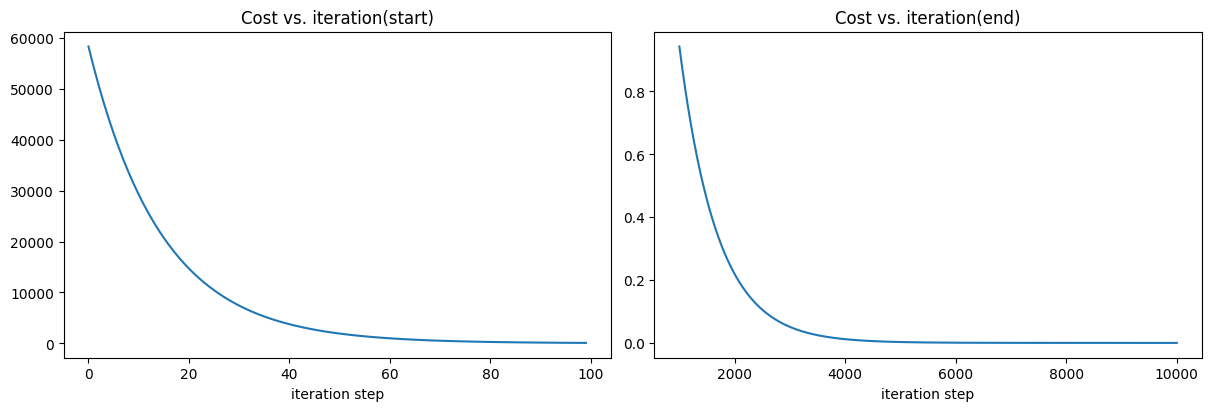

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])

ax1.set_title('Cost vs. iteration(start)')
ax2.set_title('Cost vs. iteration(end)')

ax1.set_xlabel('iteration step')
ax2.set_xlabel(ax1.get_xlabel())

plt.show()

## Predictions based on our optimal values of `[w,b]`

In [30]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


In [31]:
# compare these predictions to the values found by sklearn
print(f"1000 sqft house prediction {w_best*1.0 + b_best:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_best*1.2 + b_best:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_best*2.0 + b_best:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


In [32]:
model.predict(np.array([1.0, 1.2, 2.0]).reshape(-1, 1))

array([300., 340., 500.])

## Plotting the progress of gradient descent

In [33]:
def inbounds(a, b, xlim, ylim):
    xlow, xhigh = xlim
    ylow, yhigh = ylim
    ax, ay = a
    bx, by = b
    return (ax > xlow and ax < xhigh) and \
           (bx > xlow and bx < xhigh) and \
           (ay > ylow and ay < yhigh) and \
           (by > ylow and by < yhigh)

# test function
(inbounds([1, 1], [2, 2], (-10, 10), (-10, 10)),
 inbounds([10, 1], [2, 2], (-10, 10), (-10, 10)))

(True, False)

In [34]:
def plt_contour_wgrad(x, y, hist, ax,
                      w_range=[-100, 500, 5], b_range=[-500, 500, 5],
                      contours=[0.1, 50, 1000, 5000, 10000, 25000, 50000],
                      resolution=5, w_final=200, b_final=100, step=10):

    w0, b0 = np.meshgrid(np.arange(*w_range), np.arange(*b_range))
    z = np.zeros_like(w0)
    for i in range(w0.shape[0]):
        for j in range(w0.shape[1]):
            z[i][j] = compute_cost(x, y, w0[i][j], b0[i][j])

    CS = ax.contour(w0, b0, z,
                    levels=contours,
                    colors=['dodgerblue', 'orange', 'darkred', 'magenta'])
    ax.clabel(CS)
    ax.set_xlabel('$w$')
    ax.set_ylabel('$b$')
    ax.set_title('Contour plot of cost $J(w,b)$ vs. $(b,w)$ with path of gradient descent')
    w = w_final
    b = b_final
    ax.hlines(b, ax.get_xlim()[0], w, lw=2, color='purple', ls='dotted')
    ax.vlines(w, ax.get_ylim()[0], b, lw=2, color='purple', ls='dotted')

    base = hist[0]
    for point in hist[0::step]:
        # the points distance from the previous point
        edist = np.sqrt((base[0] - point[0])**2 + (base[1] - point[1])**2)
        if(edist > resolution or point == hist[-1]):
            if inbounds(point, base, ax.get_xlim(), ax.get_ylim()):
                plt.annotate('', xy=point, xytext=base,xycoords='data',
                             arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 3},
                             va='center', ha='center')
            base = point

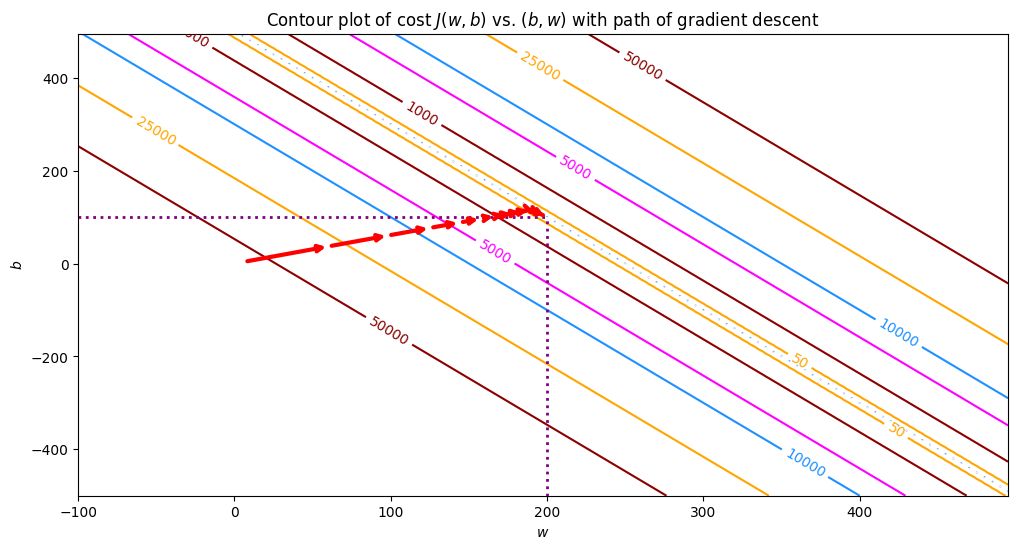

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax,
                  w_final=w_final, b_final=b_final)

Regarding the above plot:

- cost levels are represented by rings
- the red arrows show the path of gradient descent
- the path makes steady (monotonic) progress towards its goal
- initial steps are much larger than steps near the goal

Zooming in:

- shown in the plot below

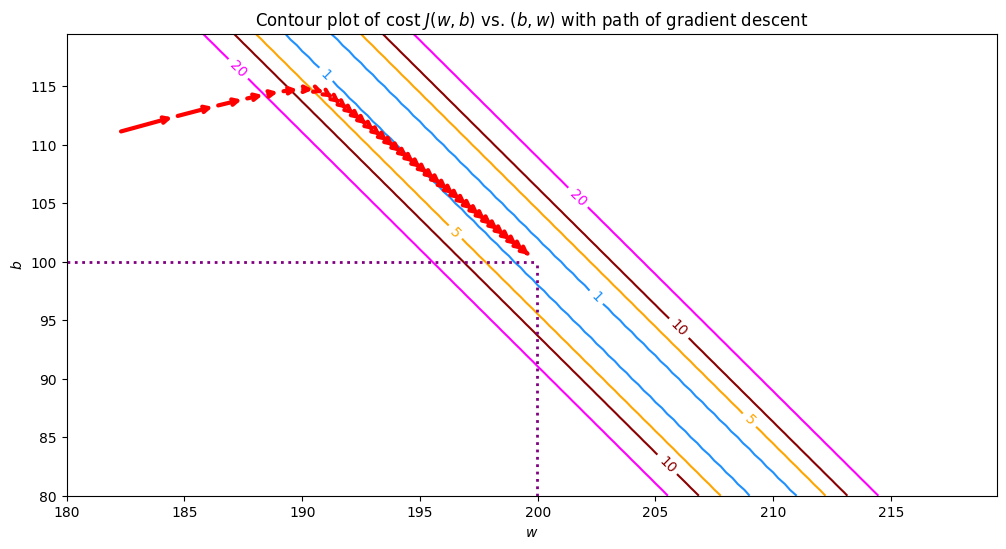

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax,
                  w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
                  contours=[1,5,10,20],resolution=0.5,
                  w_final=w_final, b_final=b_final)

## Increase the learning rate

In [37]:
w_init = 0
b_init = 0
iterations = 10
tmp_alpha = 8.0e-1

w_final, b_final, J_hist, p_hist = gradient_descent(x_train,
                                                    y_train,
                                                    w_init,
                                                    b_init,
                                                    tmp_alpha,
                                                    iterations,
                                                    compute_cost,
                                                    compute_gradient)

print(f'\n[w,b] found by gradient descent: ({w_final:8.4f},{b_final:8.4f})')

Iteration:    0, Cost 1.85e+05, dj_dw: -6.500e+02, dj_db: -4.000e+02,  w:  5.200e+02, b:  3.20000e+02
Iteration:    1, Cost 5.69e+05, dj_dw:  1.130e+03, dj_db:  7.000e+02,  w: -3.840e+02, b: -2.40000e+02
Iteration:    2, Cost 1.71e+06, dj_dw: -1.970e+03, dj_db: -1.216e+03,  w:  1.192e+03, b:  7.32800e+02
Iteration:    3, Cost 5.21e+06, dj_dw:  3.429e+03, dj_db:  2.121e+03,  w: -1.551e+03, b: -9.63840e+02
Iteration:    4, Cost 1.58e+07, dj_dw: -5.974e+03, dj_db: -3.691e+03,  w:  3.228e+03, b:  1.98886e+03
Iteration:    5, Cost 4.79e+07, dj_dw:  1.040e+04, dj_db:  6.431e+03,  w: -5.095e+03, b: -3.15579e+03
Iteration:    6, Cost 1.45e+08, dj_dw: -1.812e+04, dj_db: -1.120e+04,  w:  9.402e+03, b:  5.80237e+03
Iteration:    7, Cost 4.41e+08, dj_dw:  3.156e+04, dj_db:  1.950e+04,  w: -1.584e+04, b: -9.80139e+03
Iteration:    8, Cost 1.34e+09, dj_dw: -5.496e+04, dj_db: -3.397e+04,  w:  2.813e+04, b:  1.73730e+04
Iteration:    9, Cost 4.06e+09, dj_dw:  9.572e+04, dj_db:  5.916e+04,  w: -4.845e+

Notes about the above results:

- $w$ and $b$ are bouncing back and forth between postive and negative, with the absolute value increasing with each iteration
- with each iteration $\frac{\partial J(w,b}{\partial w}$ changes sign
- cost is increasing rather than decreasing

**All of these are signs that the learning rate is too large and the solution is diverging**

- we also see below that the cost is going up, not down

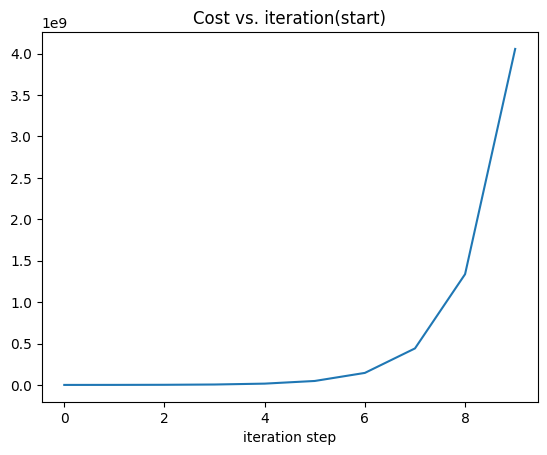

In [38]:
plt.plot(J_hist)
plt.title('Cost vs. iteration(start)')
plt.xlabel('iteration step')

plt.show()

- We can plot this divergence

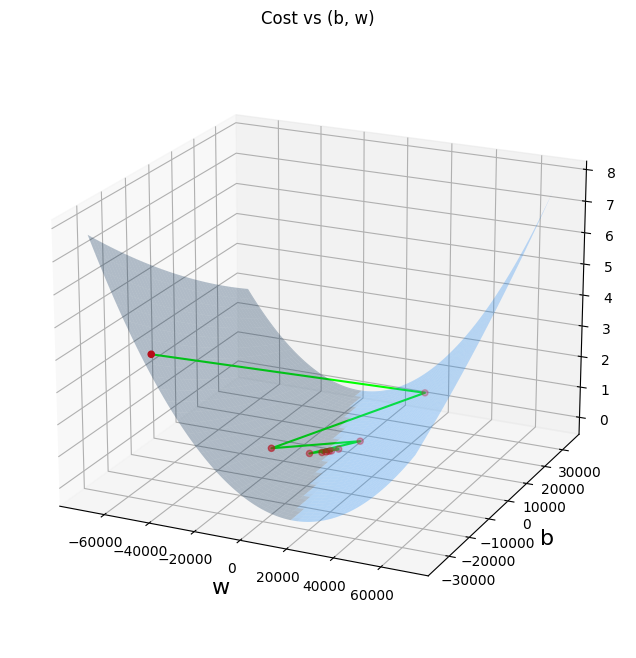

In [39]:
def plt_divergence(p_hist, J_hist, x_train, y_train):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')

    x = np.zeros(len(p_hist))
    y = np.zeros(len(p_hist))

    for i in range(len(p_hist)):
        x[i] = p_hist[i][0]
        y[i] = p_hist[i][1]

    tmp_w, tmp_b = np.meshgrid(np.arange(-70_000, 70_000, 500),
                               np.arange(-35_000, 35_000, 500))

    z = np.zeros_like(tmp_w)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i][j] = compute_cost(x_train, y_train, tmp_w[i][j], tmp_b[i][j])

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel('\ncost', fontsize=16)
    plt.title('Cost vs (b, w)')

    ax.view_init(elev=20, azim=-65)

    ax.plot_surface(tmp_w, tmp_b, z, alpha=0.3, color='dodgerblue')
    ax.scatter(x, y, J_hist, c='red')
    ax.plot(x, y, J_hist, c='lime')

plt_divergence(p_hist, J_hist, x_train, y_train)

## Plot Gradients

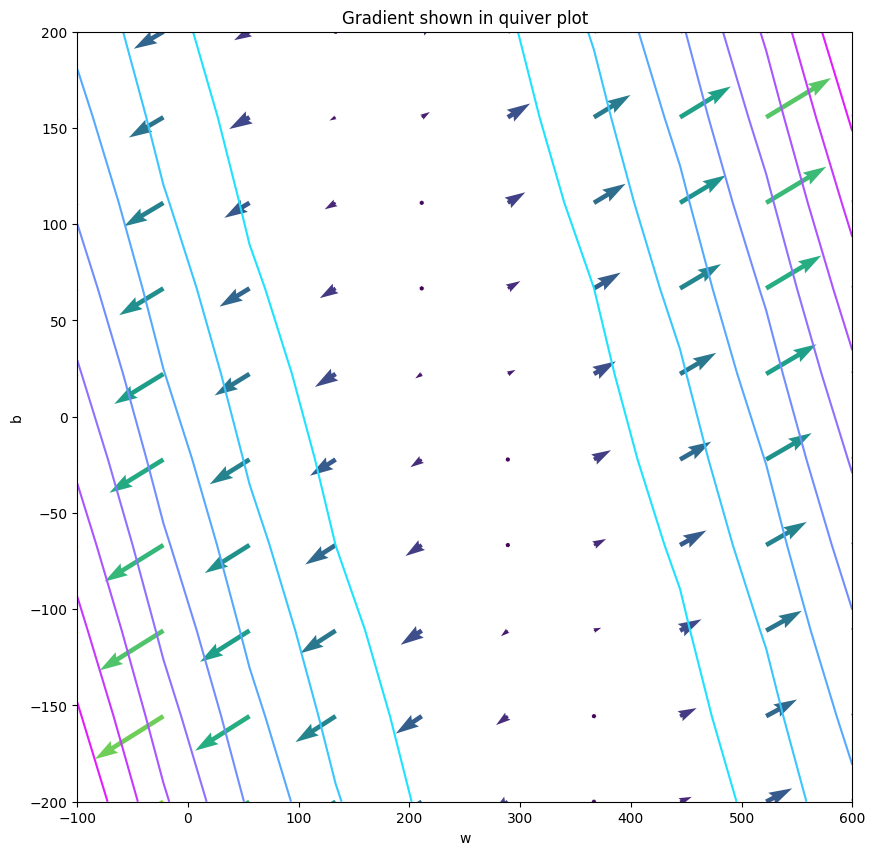

In [40]:
def plt_gradients(x_train, y_train, f_compute_cost, f_compute_gradient):
    fig, ax = plt.subplots(figsize=(10, 10))

    tmp_w, tmp_b = np.meshgrid(np.linspace(-100, 600, 10),
                               np.linspace(-200, 200, 10))

    U = np.zeros_like(tmp_w)  # dj_dw
    V = np.zeros_like(tmp_b)   # df_db
    z = np.zeros_like(tmp_w) # cost

    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i][j] = compute_cost(x_train, y_train, tmp_w[i][j], tmp_b[i][j])
            U[i][j], V[i][j] = f_compute_gradient(x_train,
                                                  y_train,
                                                  tmp_w[i][j],
                                                  tmp_b[i][j])

    X = tmp_w
    Y = tmp_b
    # color indiciates magnitude of the vector
    n = -2
    color_array = np.sqrt(((V-n)/2)**2 + ((U-n)/2)**2)

    ax.set_title('Gradient shown in quiver plot')
    Q = ax.quiver(X, Y, U, V, color_array, units='width')
    ax.set_xlabel("w")
    ax.set_ylabel("b")

    levs = np.linspace(z.min(), z.max(), 10)
    ax.contour(X, Y, z, levels=levs, cmap='cool')

plt_gradients(x_train, y_train, compute_cost, compute_gradient)

- This is a **quiver plot**
- It shows the gradient of both parameters
- The arrow sizes reflect the magnitude of the gradient at that point
- The direction and slope of the arrow reflects the ratio of $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ at that point
- Note the gradient points away from the minimum
- The scaled gradient is subtracted from the current value of $w$ or $b$
    - this moves the parameter in a direction that will reduce cost